In [1]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import nbinom
from scipy.optimize import fsolve

In [2]:

k = 10000 # Dispersion Parameter k
R0 = 3 # Mean R0
mean = R0
variance = mean + (mean**2)/k
p = mean/variance
n = mean**2 / (variance - mean)
draw = nbinom.rvs(n=n,p=p)
draws = nbinom.rvs(n=n,p=p,size=10)

In [86]:
def CalculatePAndN(R0, k):
    mean = R0
    variance = mean + (mean**2)/k
    p = mean/variance
    n = mean**2 / (variance - mean)
    return p, n

In [98]:
def DrawGenerations(G, p, n):
    infections = 1
    current_G = 0
    while (current_G < G and infections > 0):
        current_G += 1
        draws = nbinom.rvs(n=n,p=p,size=infections)
        infections = np.sum(draws)
    return(infections)

In [130]:
def DrawGenerationsPlot(G, p, n, skipFirstIterationCheck = True):
    infections = 1
    current_G = 0
    totalInfections = infections
    firstIteration = True
    while (current_G < G and infections > 0):
        current_G += 1
        draws = nbinom.rvs(n=n,p=p,size=infections)
        if (np.sum(draws) == 0 and (not firstIteration or not skipFirstIterationCheck)):
            return totalInfections
        infections = np.sum(draws)
        totalInfections += infections
        firstIteration = False
    return 0

In [108]:
R0 = 3
k = 0.1

mean = R0
variance = mean + (mean**2)/k
p = mean/variance
n = mean**2 / (variance - mean)
DrawGenerations(1, p, n)

0

In [122]:
R0 = 3
k = 0.1
p,n = CalculatePAndN(R0, k)

outbreakStoppedCount = 0
for x in range(100000):
    if DrawGenerations(5, p, n) == 0:
        outbreakStoppedCount += 1
print(outbreakStoppedCount / 100000)

0.83504


In [123]:
R0 = 3
k = 0.5
p,n = CalculatePAndN(R0, k)

outbreakStoppedCount = 0
for x in range(100000):
    if DrawGenerations(5, p, n) == 0:
        outbreakStoppedCount += 1
print(outbreakStoppedCount / 100000)

0.49902


In [124]:
R0 = 3
k = 1.0
p,n = CalculatePAndN(R0, k)

outbreakStoppedCount = 0
for x in range(100000):
    if DrawGenerations(5, p, n) == 0:
        outbreakStoppedCount += 1
print(outbreakStoppedCount / 100000)

0.33452


In [125]:
R0 = 3
k = 5.0
p,n = CalculatePAndN(R0, k)

outbreakStoppedCount = 0
for x in range(100000):
    if DrawGenerations(5, p, n) == 0:
        outbreakStoppedCount += 1
print(outbreakStoppedCount / 100000)

0.12036


In [126]:
R0 = 3
k = 10
p,n = CalculatePAndN(R0, k)

outbreakStoppedCount = 0
for x in range(100000):
    if DrawGenerations(5, p, n) == 0:
        outbreakStoppedCount += 1
print(outbreakStoppedCount / 100000)

0.09002


In [137]:
R0 = 3
k = 0.1
p,n = CalculatePAndN(R0, k)

outbreaks = []
curr_num_outbreaks = 0
while (curr_num_outbreaks < 100000):
    value =  DrawGenerationsPlot(5, p, n)
    if value != 0:
        outbreaks.append(value)
        curr_num_outbreaks += 1
    
plt.hist(outbreaks)

(array([8.8976e+04, 7.8180e+03, 1.9820e+03, 8.3300e+02, 2.4400e+02,
        8.8000e+01, 4.0000e+01, 9.0000e+00, 6.0000e+00, 4.0000e+00]),
 array([ 2. , 10.6, 19.2, 27.8, 36.4, 45. , 53.6, 62.2, 70.8, 79.4, 88. ]),
 <BarContainer object of 10 artists>)

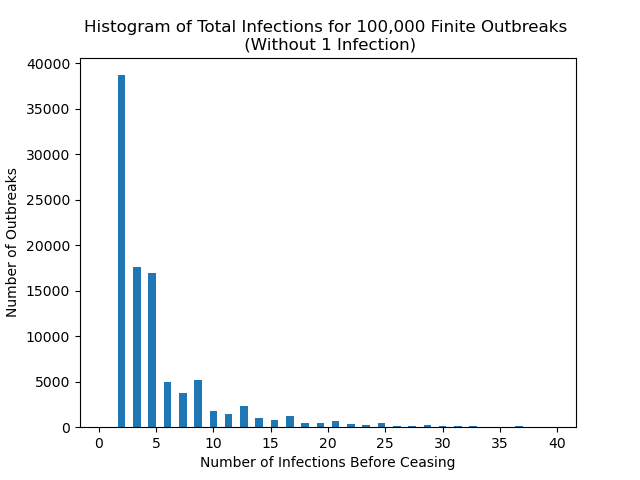

In [138]:
plt.cla()
plt.hist(outbreaks, bins=30, rwidth=0.5, range=[0,40])

plt.title("Histogram of Total Infections for 100,000 Finite Outbreaks \n (Without 1 Infection)")
plt.xlabel("Number of Infections Before Ceasing")
plt.ylabel("Number of Outbreaks")
plt.show()

plt.savefig('problem3.png')

In [139]:
R0 = 3
k = 0.1
p,n = CalculatePAndN(R0, k)

outbreaks = []
curr_num_outbreaks = 0
while (curr_num_outbreaks < 100000):
    value =  DrawGenerationsPlot(5, p, n, False)
    if value != 0:
        outbreaks.append(value)
        curr_num_outbreaks += 1
    


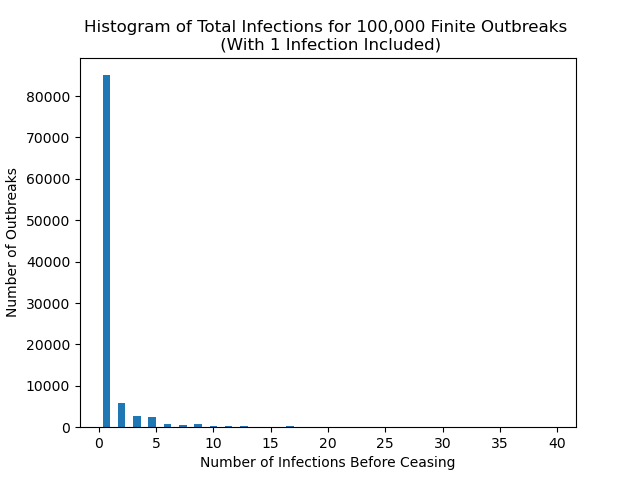

In [140]:
plt.cla()
plt.hist(outbreaks, bins=30, rwidth=0.5, range=[0,40])

plt.title("Histogram of Total Infections for 100,000 Finite Outbreaks \n (With 1 Infection Included)")
plt.xlabel("Number of Infections Before Ceasing")
plt.ylabel("Number of Outbreaks")
plt.show()

plt.savefig('problem3WithFirstIteration.png')